<a href="https://colab.research.google.com/github/Luj2000/projects/blob/main/Developing_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import software libraries

In [ ]:
#pip install category_encoders


In [ ]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import category_encoders as ce                              # Encode data.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    RandomizedSearchCV, \
                                    GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            plot_roc_curve, \
                            plot_precision_recall_curve, \
                            plot_confusion_matrix
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import imblearn                                             # Deal with imbalanced data.
from imblearn.over_sampling import SMOTE                    # Perform oversampling.
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Category Encoders {}'.format(ce.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
- NumPy 1.21.6
- pandas 1.3.5
- Matplotlib 3.2.2
- Category Encoders 2.5.1.post0
- scikit-learn 1.0.2
- XGBoost 0.90
- imbalanced-learn 0.8.1



# Load and preview the data

In [ ]:
users_data = pd.read_pickle('/content/users_data_final.pickle')

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


# Check the shape of the data

In [ ]:
users_data.shape

(45179, 33)

# Check the data types

In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

# Explore the distribution of the target variable

In [ ]:
users_data.term_deposit.value_counts(normalize = True)

False    0.883021
True     0.116979
Name: term_deposit, dtype: float64

# Split the data into target and features

In [ ]:
target_data = users_data.term_deposit
features = users_data.drop(['user_id', 'term_deposit'], axis = 1)

# Split the data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3)

In [ ]:
print('Training data features: ', X_train.shape)
print('Training data target:   ', y_train.shape)

Training data features:  (31625, 31)
Training data target:    (31625,)


# Apply oversampling to the data

In [ ]:
print('Before oversampling: ', Counter(y_train))

Before oversampling:  Counter({False: 27963, True: 3662})


In [ ]:
# Define oversampling strategy.

SMOTE = SMOTE()

# Fit and apply the transform.

X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
X_train_SMOTE = pd.DataFrame(X_train_SMOTE,
                             columns = X_train.columns)

print('After oversampling: ', Counter(y_train_SMOTE))

After oversampling:  Counter({False: 27963, True: 27963})


# Check the distribution of the test data

In [ ]:
# Test data should not be oversampled.

print('Test data features: ', X_test.shape)
print('Test data target:   ', y_test.shape)

Test data features:  (13554, 31)
Test data target:    (13554,)


In [ ]:
Counter(y_test)

Counter({False: 11931, True: 1623})

# Normalize the data

In [ ]:
norm = MinMaxScaler().fit(X_train_SMOTE)

In [ ]:
X_train_norm = norm.transform(X_train_SMOTE)

print('Minimum: ', np.min(X_train_norm))
print('Maximum: ', np.max(X_train_norm))

Minimum:  0.0
Maximum:  1.0


# Train a logistic regression model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_norm, y_train_SMOTE)

LogisticRegression()

# Make predictions using the logistic regression model

In [ ]:
logreg_y_pred = logreg.predict(X_test) 
print(Counter(logreg_y_pred))

Counter({True: 13487, False: 67})


In [ ]:
results = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results.insert(1, 'term_deposit_pred', logreg_y_pred[:5])
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,True,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,True,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,True,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the logistic regression model's score

In [ ]:
accuracy_score(y_test, logreg_y_pred)

0.12468643942747529

# Train a ***k***-nearest neighbor (***k***-NN) model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train_SMOTE)

KNeighborsClassifier()

# Make predictions using the ***k***-NN model

In [ ]:
knn_y_pred = knn.predict(X_test)
print(Counter(knn_y_pred))

Counter({True: 10197, False: 3357})


In [ ]:
results['term_deposit_pred'] = knn_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,True,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,True,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,True,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the ***k***-NN model's score

In [ ]:
accuracy_score(y_test, knn_y_pred)

0.2968865279622252

In [ ]:
print('Number of mislabeled points out of a total %d points: %d'
       % (X_test.shape[0], (y_test != knn_y_pred).sum()))

Number of mislabeled points out of a total 13554 points: 9530


# Train a support-vector machine (SVM) model

In [ ]:
svm = SVC()
svm.fit(X_train_norm, y_train_SMOTE)

SVC()

# Make predictions using the SVM model

In [ ]:
svm_y_pred = svm.predict(X_test)
print(Counter(svm_y_pred))

Counter({False: 13554})


In [ ]:
results['term_deposit_pred'] = svm_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,False,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,False,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,False,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the SVM model's score

In [ ]:
accuracy_score(y_test, svm_y_pred)

0.880256750774679

# Train a naïve Bayes model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_SMOTE, y_train_SMOTE)

GaussianNB()

# Make predictions using the naïve Bayes model

In [ ]:
gnb_y_pred = gnb.predict(X_test)
print(Counter(gnb_y_pred))

Counter({False: 9681, True: 3873})


In [ ]:
results['term_deposit_pred'] = gnb_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,False,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,True,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,False,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the naïve Bayes model's score

In [ ]:
accuracy_score(y_test, gnb_y_pred)

0.7014903349564704

# Train a decision tree model

In [ ]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

# Make predictions using the decision tree model

In [ ]:
clf_tree_y_pred = clf_tree.predict(X_test)
print(Counter(clf_tree_y_pred))

Counter({False: 11609, True: 1945})


In [ ]:
results['term_deposit_pred'] = clf_tree_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,True,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,False,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,False,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the decision tree model's score

In [ ]:
accuracy_score(y_test, clf_tree_y_pred)

0.8314888593773055

# Visualize the decision tree

In [ ]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_22 <= 201.50
|   |--- feature_22 <= 114.50
|   |   |--- feature_22 <= 77.50
|   |   |   |--- feature_24 <= 372.50
|   |   |   |   |--- feature_23 <= 3.50
|   |   |   |   |   |--- feature_25 <= 3.50
|   |   |   |   |   |   |--- feature_1 <= 10271.10
|   |   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_30 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_

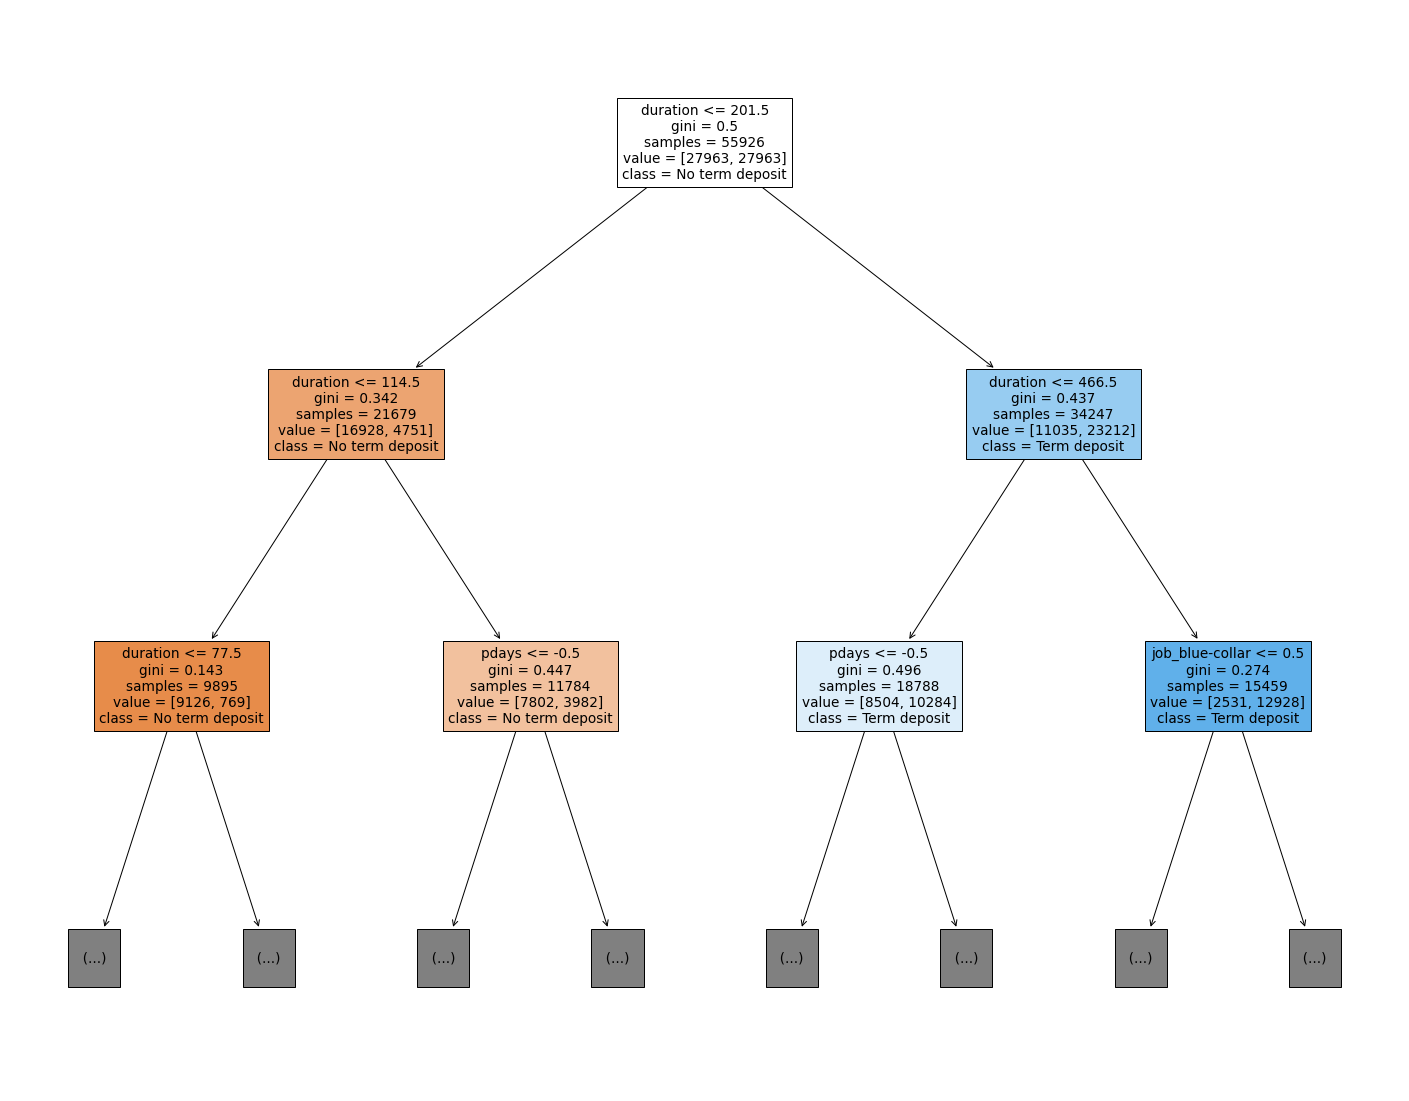

In [ ]:
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(clf_tree, 
                   feature_names = list(X_train.columns),  
                   class_names = ['No term deposit', 'Term deposit'],
                   max_depth = 2,
                   filled = True)

# Train a random forest model

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

# Make predictions using the random forest model

In [ ]:
rf_y_pred = rf.predict(X_test)
print(Counter(rf_y_pred))

Counter({False: 12512, True: 1042})


In [ ]:
results['term_deposit_pred'] = rf_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,False,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,False,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,False,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the random forest model's score

In [ ]:
accuracy_score(y_test, rf_y_pred)

0.8817323299395012

# Train a gradient boosting model

In [ ]:
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(eval_metric='logloss')

# Make predictions using the gradient boosting model

In [ ]:
xgb_y_pred = xgb.predict(X_test)
print(Counter(xgb_y_pred))

Counter({False: 11817, True: 1737})


In [ ]:
results['term_deposit_pred'] = xgb_y_pred[:5]
results

,term_deposit,term_deposit_pred,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,...,contact_telephone,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined
43308,False,True,0.0,1369.42,1,0,0,0,0,0,...,1,129,1,188,2,0,0,0,2,3
32770,False,False,2.0,246.00,0,0,0,1,0,0,...,0,191,1,150,7,0,0,0,1,7
17440,False,True,0.0,1369.42,0,0,0,0,0,0,...,0,780,2,-1,0,0,0,0,2,5
36164,False,False,0.0,1369.42,0,0,0,1,0,0,...,0,114,2,-1,0,1,0,1,2,10
29218,False,False,0.0,1369.42,0,0,0,0,0,0,...,0,111,1,-1,0,0,0,0,2,5


# Obtain the gradient boosting model's score

In [ ]:
accuracy_score(y_test, xgb_y_pred)

0.8736904234912203

# Define the parameter grid used to tune the logistic regression model

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

param_grid = dict(solver = solvers, penalty = penalty, C = c_values)

print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [10, 1.0, 0.1, 0.01]}


# Perform a randomized search for optimal hyperparameters

In [ ]:
model = LogisticRegression()
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid)
random_search.fit(X_train_norm, y_train_SMOTE)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

In [ ]:
# Summarize the results of the randomized search.

print('Best accuracy score:', round(random_search.best_score_, 4))
print('Best parameters:    ', random_search.best_params_)

Best accuracy score: 0.8948
Best parameters:     {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


# Perform a grid search for optimal hyperparameters

In [ ]:
model = LogisticRegression()
grid_search = GridSearchCV(estimator = model,
                           param_grid = param_grid)
logreg_fit = grid_search.fit(X_train_norm, y_train_SMOTE)

In [ ]:
# Summarize the results of the grid search.

print('Best accuracy score:', round(grid_search.best_score_, 4))
print('Best parameters:    ', grid_search.best_params_)

Best accuracy score: 0.8948
Best parameters:     {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


# Tune the gradient boosting model to reduce overfitting

In [ ]:
model = XGBClassifier(eval_metric = 'logloss')

param_grid = {
    'n_estimators': [10],
    'max_depth': [15, 20, 25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3]
}

In [ ]:
gs = GridSearchCV(estimator = model,
                  param_grid = param_grid, 
                  n_jobs = -1, 
                  scoring = 'accuracy',
                  verbose = 2)

fitted_model = gs.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
print('Best accuracy score:', round(gs.best_score_, 4))
print('Best parameters:    ', gs.best_params_)

Best accuracy score: 0.9006
Best parameters:     {'max_depth': 20, 'n_estimators': 10, 'reg_alpha': 1.2, 'reg_lambda': 1.2}


# Compare evaluation metrics for each model

In [ ]:
models = ['Logistic Regression', 'Naïve Bayes', 'SVM', 'k-NN',
          'Decision Tree', 'Random Forest', 'XGBoost', 'Dummy Classifier']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

pred_list = ['logreg_y_pred', 'gnb_y_pred', 'svm_y_pred', 'knn_y_pred',
             'clf_tree_y_pred','rf_y_pred', 'xgb_y_pred', 'dummy_y_pred']

# Baseline algorithm.
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(X_train_SMOTE, y_train_SMOTE)
dummy_y_pred = dummy.predict(X_test)

scores = np.empty((0, 4))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[accuracy_score(y_test, globals()[i]),
                                  precision_score(y_test, globals()[i]),
                                  recall_score(y_test, globals()[i]),
                                  f1_score(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'F1', ascending = False)

,Accuracy,Precision,Recall,F1
XGBoost,0.8737,0.4744,0.5077,0.4905
Random Forest,0.8817,0.5096,0.3272,0.3985
Decision Tree,0.8315,0.3301,0.3956,0.3599
Naïve Bayes,0.7015,0.1872,0.4467,0.2638
Logistic Regression,0.1247,0.1203,1.0000,0.2148
k-NN,0.2969,0.1123,0.7055,0.1937
Dummy Classifier,0.4964,0.1171,0.4904,0.1891
SVM,0.8803,0.0000,0.0000,0.0000


# Generate a confusion matrix

In [ ]:
confusion_matrix(y_test, xgb_y_pred) 

array([[11018,   913],
       [  799,   824]])

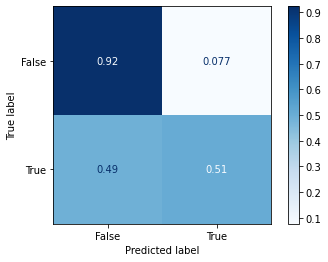

In [ ]:
plot_confusion_matrix(xgb, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues,
                      normalize = 'true')

plt.show();

# Plot a ROC curve

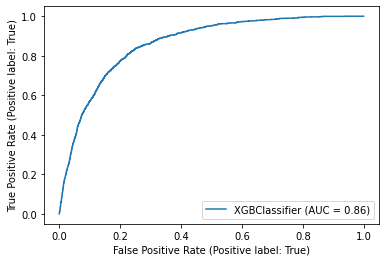

In [ ]:
plot_roc_curve(xgb, X_test, y_test)  
plt.show()

# Plot a precision–recall curve

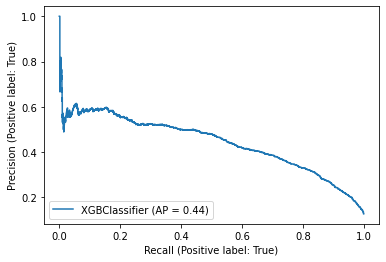

In [ ]:
plot_precision_recall_curve(xgb, X_test, y_test)

plt.show();

# Generate a feature importance plot

In [ ]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

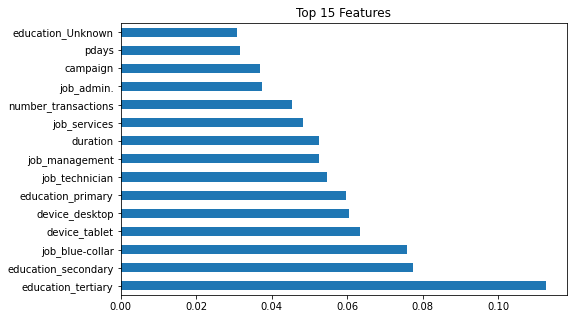

In [ ]:
feature_importance_plot(xgb, X_train_SMOTE, 15)

# Plot learning curves

In [ ]:
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, X_train, y_train, cv = 5,
                   scoring = 'accuracy', n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

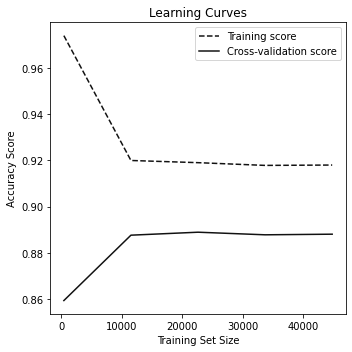

In [ ]:
plot_learning_curves(xgb, X_train_SMOTE, y_train_SMOTE)

# Save the best model

In [ ]:
pickle.dump(xgb, open('xgboost_classifier.pickle', 'wb'))